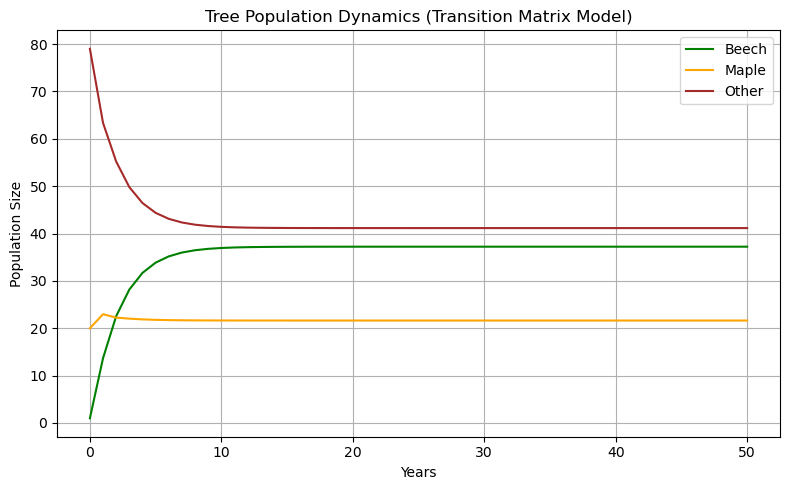

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- initial population (beech, maple, other) ---
n = np.array([1, 20, 79], dtype=float)
# --- transition matrix ---
# rows = next year's species proportions
# columns = current year's species proportions
A = np.array([
    [0.8, 0.25, 0.1],   # From Beech 
    [0.25, 0.15, 0.25], # From Maple 
    [0.1, 0.6, 0.65]   # From Other 
])


# --- Simulation settings ---
timesteps = 50
history = [n.copy()]

# --- Simulate population changes over time ---
for t in range(timesteps):
    n_next = A @ n 
    #cap the total population at 100
    total = n_next.sum()
    if total > 100:
        n_next = (n_next * (100 / total))
    history.append(n_next)
    n = n_next

# --- Convert history to numpy array ---
history = np.array(history)

# --- Plot results ---
years = np.arange(timesteps + 1)
plt.figure(figsize=(8, 5))
plt.plot(years, history[:, 0], label='Beech', color='green')
plt.plot(years, history[:, 1], label='Maple', color='orange')
plt.plot(years, history[:, 2], label='Other', color='brown')
plt.xlabel('Years')
plt.ylabel('Population Size')
plt.title('Tree Population Dynamics (Transition Matrix Model)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
#stationary distribution
stationary_dist = history[-1] / history[-1].sum()
print("Stationary distribution (proportions of Beech, Maple, Other):", stationary_dist)
#calculate the probability of extinction for both species over 50 years
extinct_prob_species = history[-1, 0] + history[-1, 2]
print(f"Probability of extinction for Species after {timesteps} years: {extinct_prob_species:.4f}")                        

Stationary distribution (proportions of Beech, Maple, Other): [0.76536803 0.19701504 0.0076741  0.02994283]
Probability of extinction for Species after 50 years: 0.7525


In [50]:
#probability that a randomly selected individual from this population at year 50 is a Maple
prob_maple = history[-1, 1] / history[-1].sum()
print(f"Probability that a randomly selected individual at year {timesteps} is a Maple: {prob_maple:.4f}")


Probability that a randomly selected individual at year 50 is a Maple: 0.1970


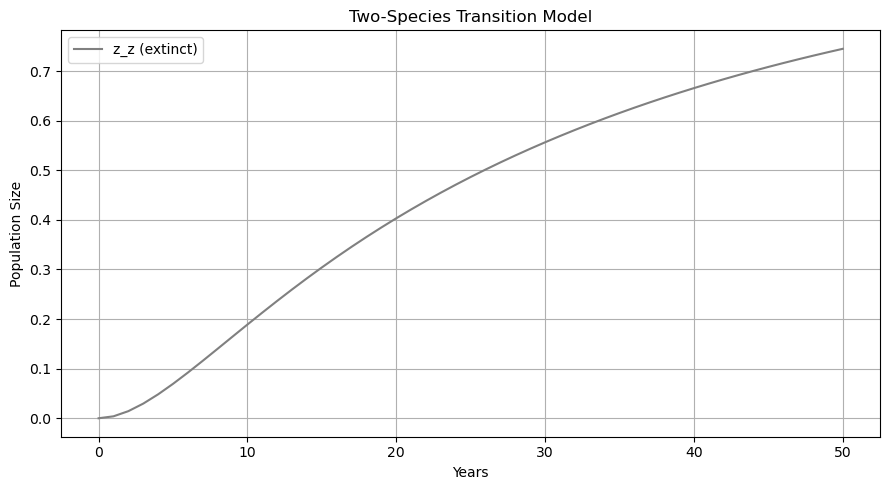

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# --- Initial populations for two species model ---
# z = zero or extinct
# p = populations
z_z = 0
p_z = 0
z_p = 0 
p_p = 1 

# Combine into initial population vector
n = np.array([z_z, p_z, z_p, p_p], dtype=float)

# --- Transition matrix ---
A = np.array([
    [1.0,   0.029,  0.13,   0.0039],  # From z_z
    [0.0,   0.95,   0.0026, 0.13],    # From p_z
    [0.0,   0.0006, 0.85,   0.026],   # From z_p
    [0.0,   0.019,  0.017,  0.84]     # From p_p
])

# --- Simulation settings ---
timesteps = 50
history = [n.copy()]

# --- Simulate population changes over time ---
for t in range(timesteps):
    n_next = A @ n
    
    # Cap total population at 100
    total = n_next.sum()
    if total > 100:
        n_next = n_next * (100 / total)
    
    history.append(n_next)
    n = n_next

# --- Convert history to numpy array ---
history = np.array(history)

# --- Plot results ---
years = np.arange(timesteps + 1)
plt.figure(figsize=(9, 5))
plt.plot(years, history[:, 0], label='z_z (extinct)', color='gray')
plt.xlabel('Years')
plt.ylabel('Population Size')
plt.title('Two-Species Transition Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
#calculate the probability of extinction for both species over 50 years

extinct_prob_species = history[-1, 0] + history[-1, 2]
print(f"Probability of extinction for Species after {timesteps} years: {extinct_prob_species2:.4f}")  

Probability of extinction for Species after 50 years: 0.7525
